In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("16P.csv", encoding = "cp1252")

In [3]:
df.head()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ


In [4]:
df.dtypes

Response Id                                                                                    int64
You regularly make new friends.                                                                int64
You spend a lot of your free time exploring various random topics that pique your interest     int64
Seeing other people cry can easily make you feel like you want to cry too                      int64
You often make a backup plan for a backup plan.                                                int64
                                                                                               ...  
You are very intrigued by things labeled as controversial.                                     int64
You would pass along a good opportunity if you thought someone else needed it more.            int64
You struggle with deadlines.                                                                   int64
You feel confident that things will work out for you.                                      

In [5]:
df.isna().any()

Response Id                                                                                   False
You regularly make new friends.                                                               False
You spend a lot of your free time exploring various random topics that pique your interest    False
Seeing other people cry can easily make you feel like you want to cry too                     False
You often make a backup plan for a backup plan.                                               False
                                                                                              ...  
You are very intrigued by things labeled as controversial.                                    False
You would pass along a good opportunity if you thought someone else needed it more.           False
You struggle with deadlines.                                                                  False
You feel confident that things will work out for you.                                         False


In [6]:
df = df.drop(columns="Response Id")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 61 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   You regularly make new friends.                                                                                       59999 non-null  int64 
 1   You spend a lot of your free time exploring various random topics that pique your interest                            59999 non-null  int64 
 2   Seeing other people cry can easily make you feel like you want to cry too                                             59999 non-null  int64 
 3   You often make a backup plan for a backup plan.                                                                       59999 non-null  int64 
 4   You usuall

In [8]:
df.describe()

,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,Even a small mistake can cause you to doubt your overall abilities and knowledge.,...,You would love a job that requires you to work alone most of the time.,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.
count,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,...,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000
mean,-0.000867,-0.000467,0.000267,-0.232887,-0.175653,0.005317,-0.476558,-0.000550,0.126819,-0.003283,...,0.001233,0.000133,0.115869,-0.002167,0.240687,-0.000533,0.000667,0.125152,0.001983,0.118202
std,0.365701,0.364652,1.527343,1.502173,1.502999,1.521413,1.445931,0.367361,1.537329,0.367347,...,0.365517,0.367611,1.526440,0.366515,1.498320,0.364606,0.368426,1.515761,1.524584,1.542457
min,-2.000000,-1.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-1.000000,-3.000000,-1.000000,...,-1.000000,-1.000000,-3.000000,-1.000000,-3.000000,-1.000000,-2.000000,-3.000000,-3.000000,-3.000000
25%,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.000000,0.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,1.000000,...,2.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000


In [9]:
mapping = {
    'ESTJ': 0,
    'ENTJ': 1,
    'ESFJ': 2,
    'ENFJ': 3,
    'ISTJ': 4,
    'ISFJ': 5,
    'INTJ': 6,
    'INFJ': 7,
    'ESTP': 8,
    'ESFP': 9,
    'ENTP': 10,
    'ENFP': 11,
    'ISTP': 12,
    'ISFP': 13,
    'INTP': 14,
    'INFP': 15
}

df['Personality'] = df['Personality'].map(mapping)


/var/folders/ph/d40bjj313kq3bmcc6_r6yxqw0000gn/T/ipykernel_1628/2873457649.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=personality_counts.index, y=personality_counts.values, palette='viridis')


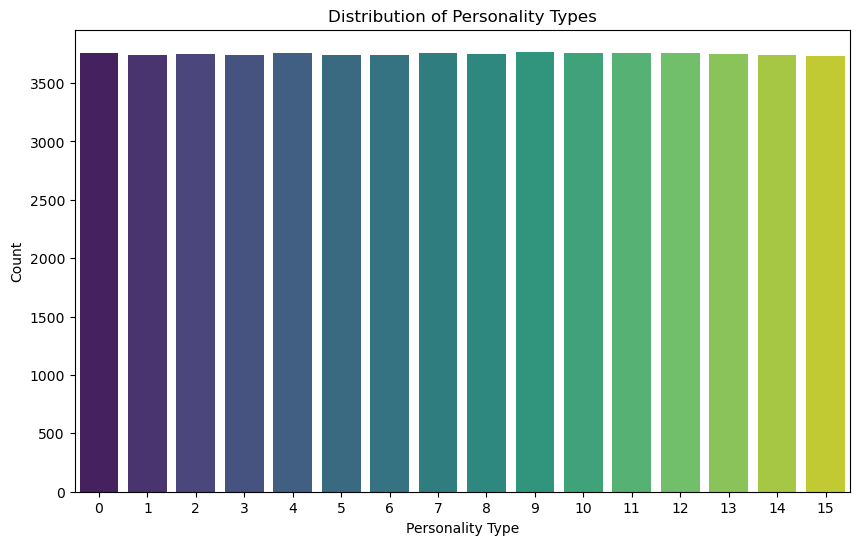

In [10]:
# Count the number of occurrences of each personality type
personality_counts = df['Personality'].value_counts()

# Plot the distribution of personality types
plt.figure(figsize=(10, 6))
sns.barplot(x=personality_counts.index, y=personality_counts.values, palette='viridis')
plt.title('Distribution of Personality Types')
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.show()

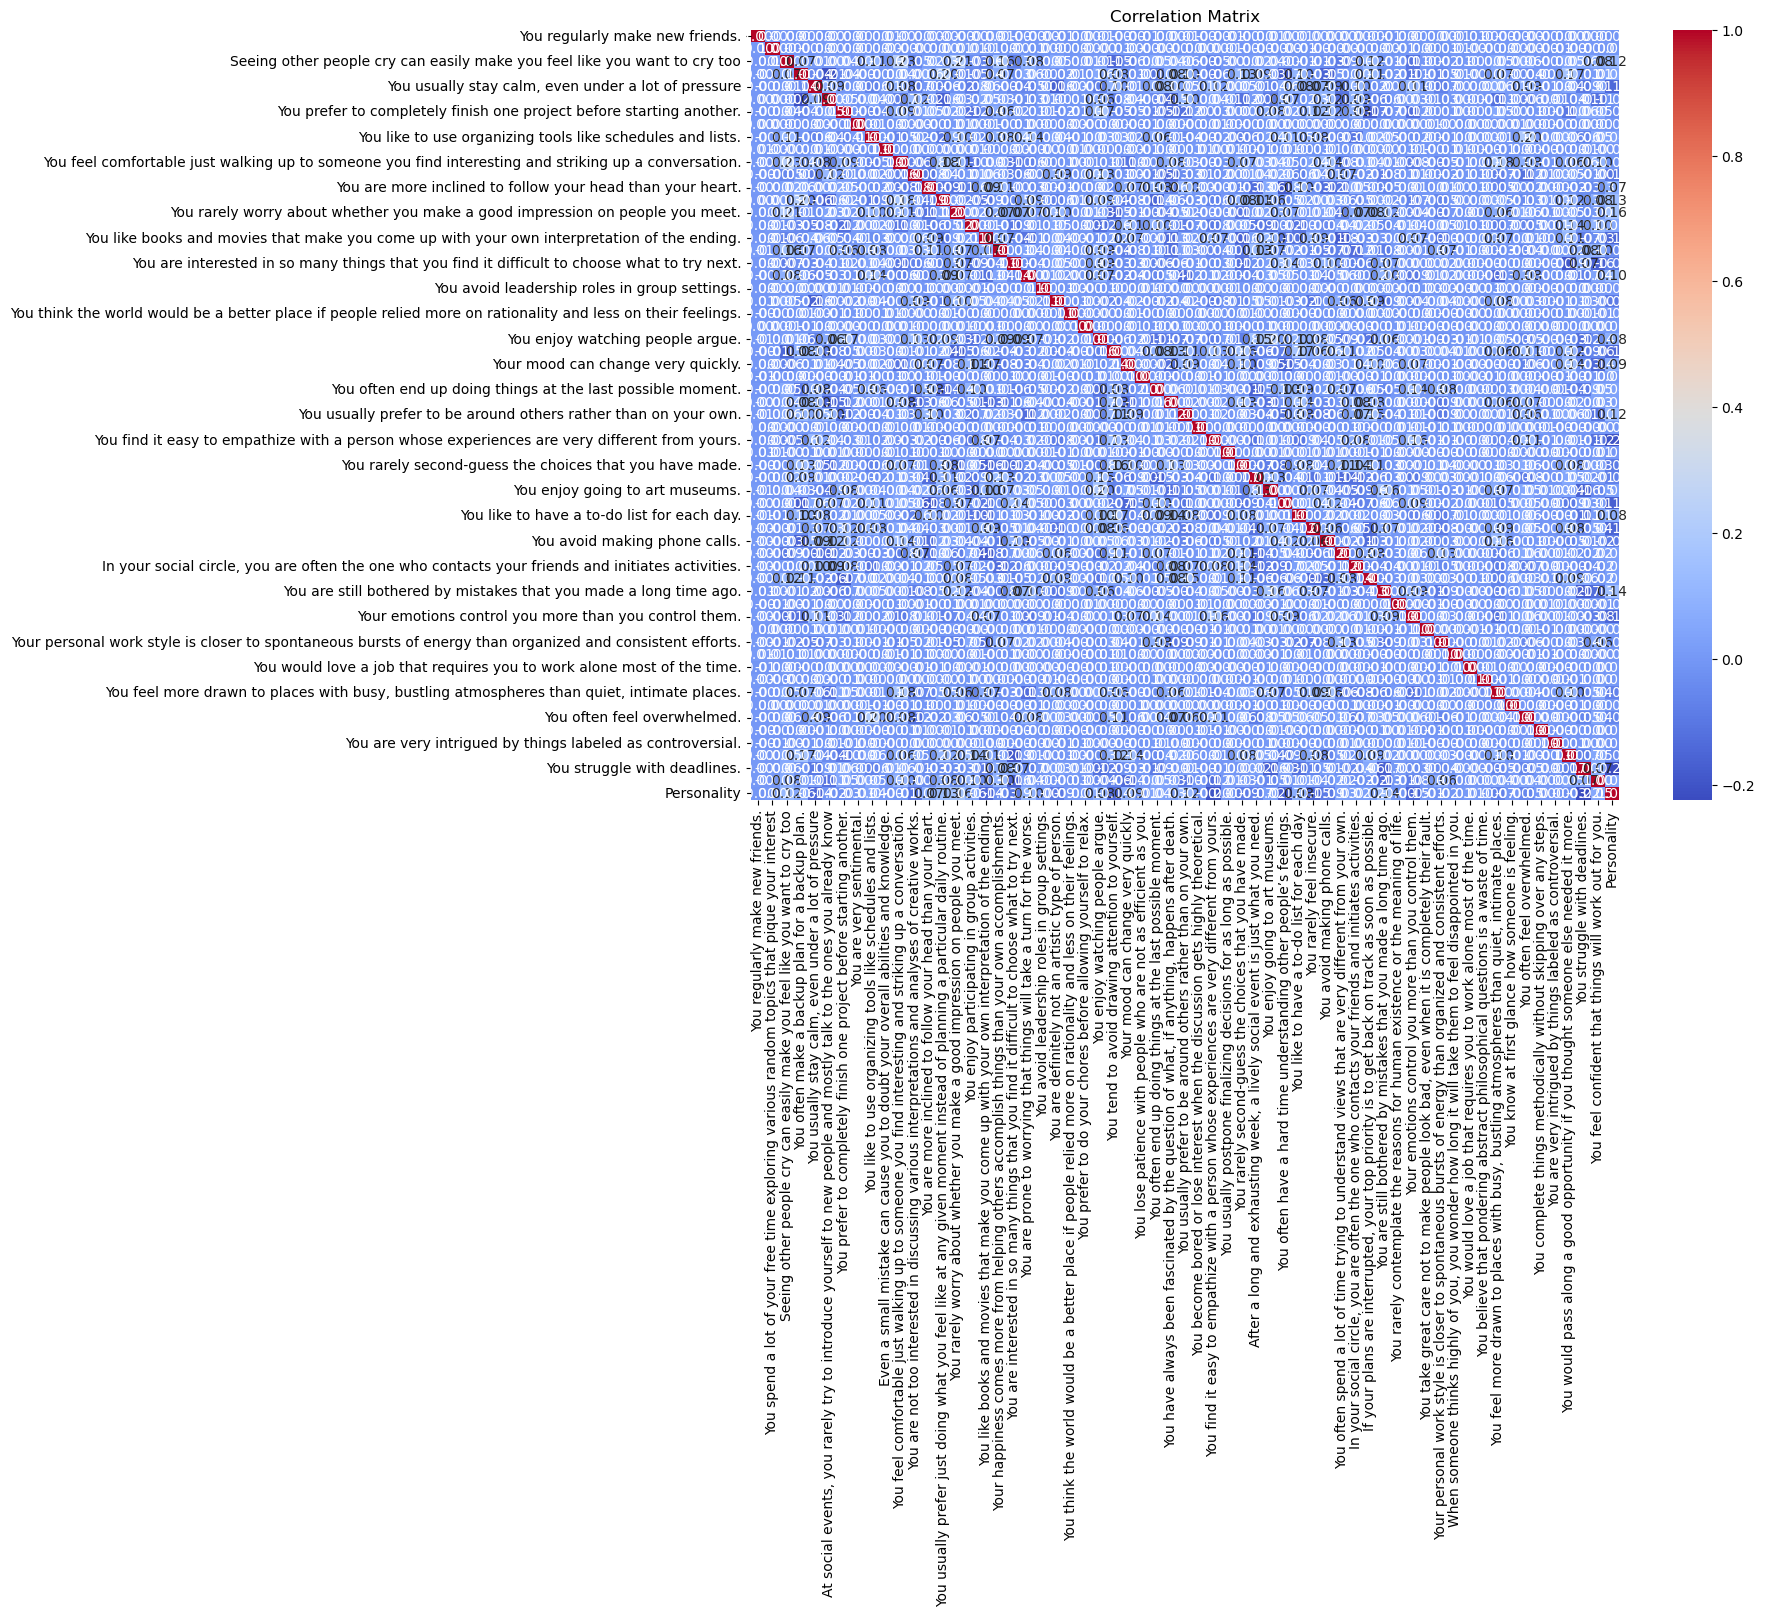

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Diagonal elements: These are always 1 because they represent the correlation of each variable with itself.

# Range of values: The values range from -1 to 1:
# 1 indicates a perfect positive correlation.
# -1 indicates a perfect negative correlation.
# 0 indicates no correlation.

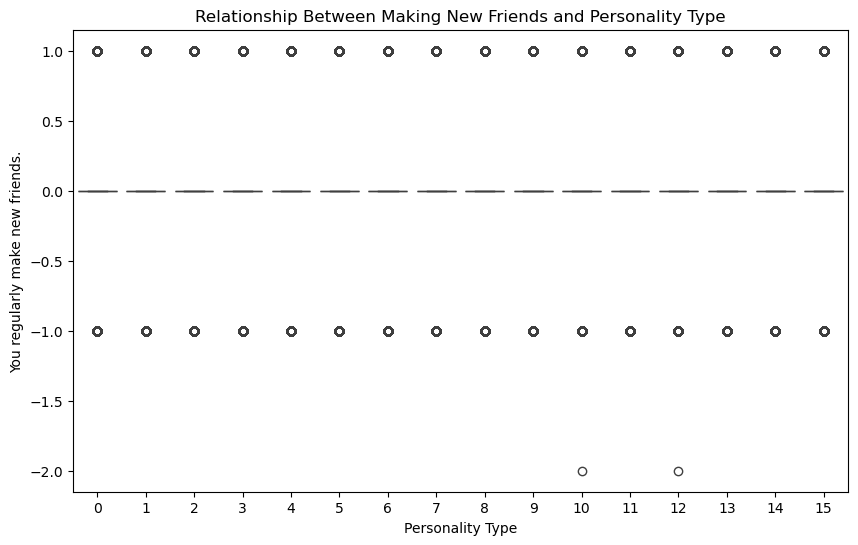

In [12]:
# Relationship between 'You regularly make new friends.' and 'Personality'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personality', y='You regularly make new friends.', data=df)
plt.title('Relationship Between Making New Friends and Personality Type')
plt.xlabel('Personality Type')
plt.ylabel('You regularly make new friends.')
plt.show()


# Boxes: Each box will represent the interquartile range (IQR) of the responses for a particular personality type. The IQR contains the middle 50% of the data.
# Median Line: A line inside each box will represent the median response for that personality type.
# Whiskers: The whiskers extend from the box to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles.
# Outliers: Individual points outside the whiskers will be plotted as outliers, indicating responses that are significantly different from the rest of the data.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


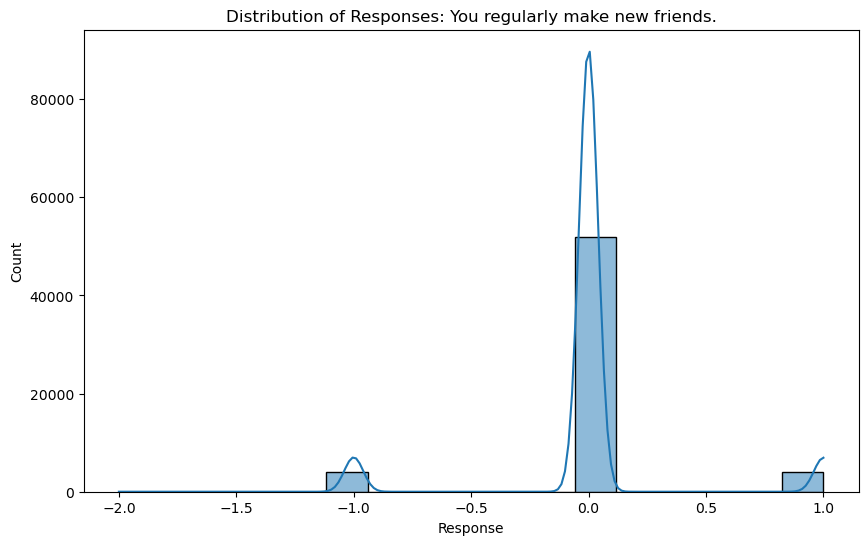

In [13]:
# Example: Distribution of responses for 'You regularly make new friends.'
plt.figure(figsize=(10, 6))
sns.histplot(df['You regularly make new friends.'], kde=True)
plt.title('Distribution of Responses: You regularly make new friends.')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

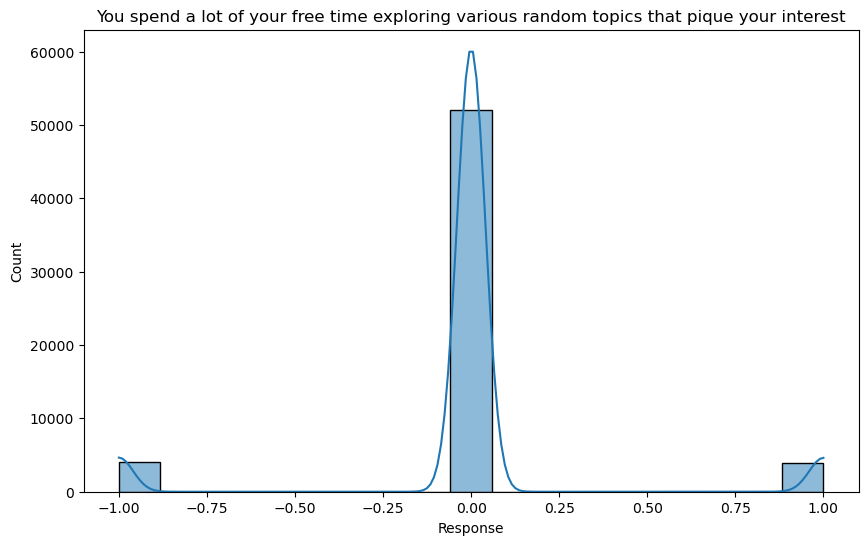

In [14]:
# Example: Distribution of responses for 'You regularly make new friends.'
plt.figure(figsize=(10, 6))
sns.histplot(df['You spend a lot of your free time exploring various random topics that pique your interest'], kde=True)
plt.title('You spend a lot of your free time exploring various random topics that pique your interest')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

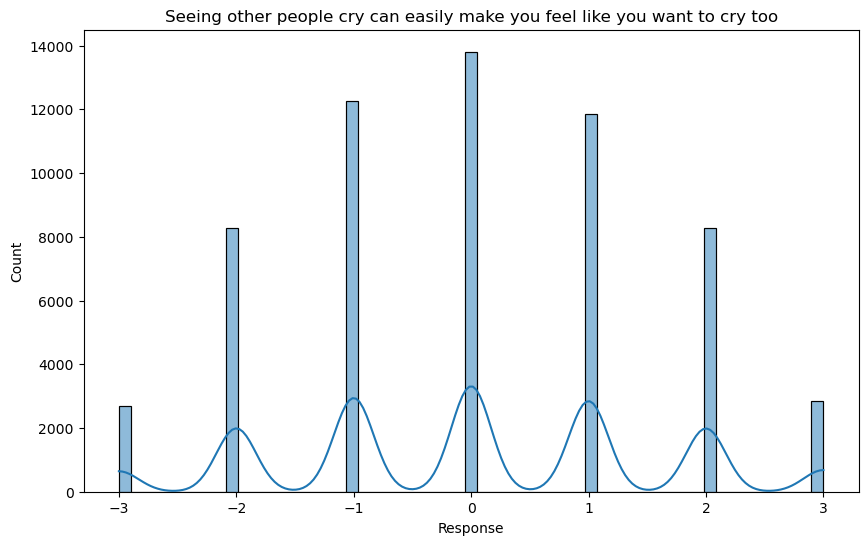

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Seeing other people cry can easily make you feel like you want to cry too'], kde=True)
plt.title('Seeing other people cry can easily make you feel like you want to cry too')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

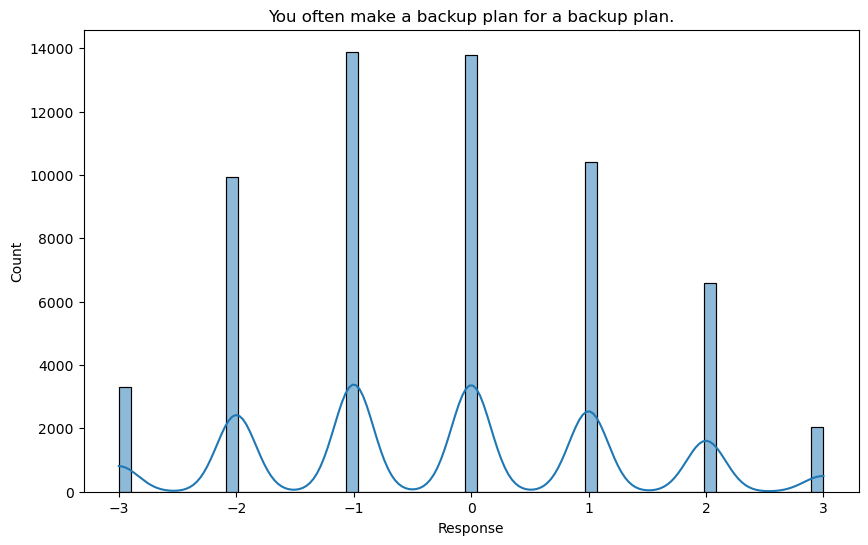

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['You often make a backup plan for a backup plan.'], kde=True)
plt.title('You often make a backup plan for a backup plan.')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

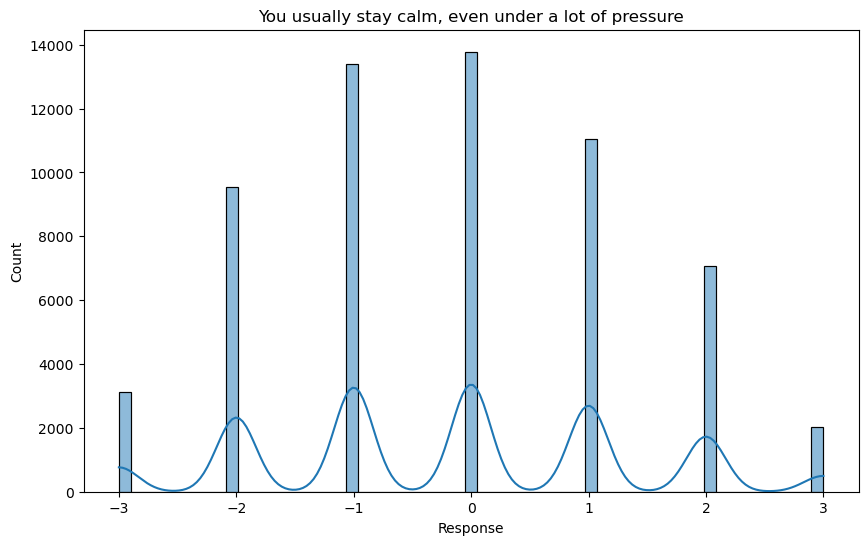

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['You usually stay calm, even under a lot of pressure'], kde=True)
plt.title('You usually stay calm, even under a lot of pressure')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

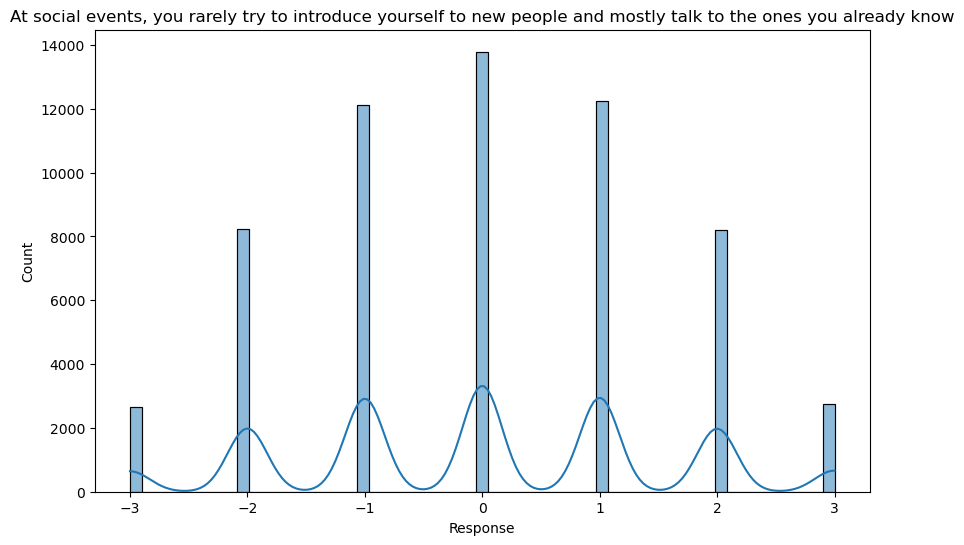

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know'], kde=True)
plt.title('At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

In [19]:
df["Personality"]

0        11
1        13
2         7
3        12
4         3
         ..
59994     7
59995     8
59996    12
59997     4
59998     7
Name: Personality, Length: 59999, dtype: int64

In [20]:
# Transform DataFrame to NumPy Array Collection

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=['Personality'])
y = df['Personality']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Feature normalization
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# k-NN without normalization
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("k-NN without normalization")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# k-NN with normalization
knn_normalized = KNeighborsClassifier(n_neighbors=5)
knn_normalized.fit(X_train_normalized, y_train)
y_pred_normalized = knn_normalized.predict(X_test_normalized)
print("k-NN with normalization")
print(classification_report(y_test, y_pred_normalized))
print(f"Accuracy: {accuracy_score(y_test, y_pred_normalized):.2f}")


k-NN without normalization
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       739
           1       0.99      0.99      0.99       738
           2       0.99      0.99      0.99       770
           3       0.99      0.99      0.99       739
           4       0.99      0.99      0.99       740
           5       0.99      0.99      0.99       753
           6       0.98      0.99      0.99       699
           7       0.99      0.98      0.99       775
           8       0.99      0.99      0.99       773
           9       0.99      0.98      0.99       790
          10       0.99      0.99      0.99       748
          11       0.99      0.99      0.99       773
          12       0.99      0.99      0.99       725
          13       0.99      0.99      0.99       745
          14       0.98      0.99      0.99       744
          15       0.99      0.99      0.99       749

    accuracy                           0.99     12000

/Users/omer_guler/opt/anaconda3/lib/python3.9/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


k-NN with normalization
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       739
           1       0.98      0.99      0.98       738
           2       0.98      0.98      0.98       770
           3       0.99      0.99      0.99       739
           4       0.98      0.99      0.98       740
           5       0.99      0.98      0.98       753
           6       0.98      0.99      0.98       699
           7       0.99      0.98      0.98       775
           8       0.99      0.99      0.99       773
           9       0.99      0.97      0.98       790
          10       0.99      0.99      0.99       748
          11       0.99      0.99      0.99       773
          12       0.99      0.98      0.98       725
          13       0.98      0.99      0.99       745
          14       0.97      0.99      0.98       744
          15       0.98      0.98      0.98       749

    accuracy                           0.98     12000
  

In [23]:
# Weighted k-NN without normalization
weighted_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
weighted_knn.fit(X_train, y_train)
y_pred_weighted = weighted_knn.predict(X_test)
print("Weighted k-NN without normalization")
print(classification_report(y_test, y_pred_weighted))
print(f"Accuracy: {accuracy_score(y_test, y_pred_weighted):.2f}")

# Weighted k-NN with normalization
weighted_knn_normalized = KNeighborsClassifier(n_neighbors=5, weights='distance')
weighted_knn_normalized.fit(X_train_normalized, y_train)
y_pred_weighted_normalized = weighted_knn_normalized.predict(X_test_normalized)
print("Weighted k-NN with normalization")
print(classification_report(y_test, y_pred_weighted_normalized))
print(f"Accuracy: {accuracy_score(y_test, y_pred_weighted_normalized):.2f}")


Weighted k-NN without normalization
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       739
           1       0.99      0.99      0.99       738
           2       0.99      0.99      0.99       770
           3       0.99      0.99      0.99       739
           4       0.99      0.99      0.99       740
           5       0.99      0.99      0.99       753
           6       0.98      0.99      0.99       699
           7       0.99      0.98      0.99       775
           8       0.99      0.99      0.99       773
           9       0.99      0.98      0.99       790
          10       0.99      0.99      0.99       748
          11       0.99      0.99      0.99       773
          12       0.99      0.99      0.99       725
          13       0.99      0.99      0.99       745
          14       0.98      0.99      0.99       744
          15       0.99      0.99      0.99       749

    accuracy                           0.99 

In [24]:
import joblib

# Save the trained model
joblib.dump(knn_normalized, 'knn_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

feature_names = X.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

['feature_names.pkl']

In [25]:
import pandas as pd
import joblib

# Define the new data based on the structure provided
new_data = pd.DataFrame({
    'Response Id': [0],
    'You regularly make new friends.': [1],
    'You spend a lot of your free time exploring various random topics that pique your interest': [0],
    'Seeing other people cry can easily make you feel like you want to cry too': [-2],
    'You often make a backup plan for a backup plan.': [0],
    'You usually stay calm, even under a lot of pressure': [0],
    'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know': [2],
    'You prefer to completely finish one project before starting another.': [2],
    'You are very sentimental.': [1],
    'You like to use organizing tools like schedules and lists.': [1],
    'Even a small mistake can cause you to doubt your overall abilities and knowledge.': [-2],
    'You feel comfortable just walking up to someone you find interesting and striking up a conversation.': [-2],
    'You are not too interested in discussing various interpretations and analyses of creative works.': [0],
    'You are more inclined to follow your head than your heart.': [3],
    'You usually prefer just doing what you feel like at any given moment instead of planning a particular daily routine.': [-2],
    'You rarely worry about whether you make a good impression on people you meet.': [3],
    'You enjoy participating in group activities.': [1],
    'You like books and movies that make you come up with your own interpretation of the ending.': [2],
    'Your happiness comes more from helping others accomplish things than your own accomplishments.': [-2],
    'You are interested in so many things that you find it difficult to choose what to try next.': [2],
    'You are prone to worrying that things will take a turn for the worse.': [1],
    'You avoid leadership roles in group settings.': [-2],
    'You are definitely not an artistic type of person.': [-1],
    'You think the world would be a better place if people relied more on rationality and less on their feelings.': [3],
    'You prefer to do your chores before allowing yourself to relax.': [1],
    'You enjoy watching people argue.': [1],
    'You tend to avoid drawing attention to yourself.': [2],
    'Your mood can change very quickly.': [-1],
    'You lose patience with people who are not as efficient as you.': [1],
    'You often end up doing things at the last possible moment.': [-1],
    'You have always been fascinated by the question of what, if anything, happens after death.': [3],
    'You usually prefer to be around others rather than on your own.': [-3],
    'You become bored or lose interest when the discussion gets highly theoretical.': [-2],
    'You find it easy to empathize with a person whose experiences are very different from yours.': [-2],
    'You usually postpone finalizing decisions for as long as possible.': [0],
    'You rarely second-guess the choices that you have made.': [0],
    'After a long and exhausting week, a lively social event is just what you need.': [-3],
    'You enjoy going to art museums.': [-1],
    'You often have a hard time understanding other people’s feelings.': [-2],
    'You like to have a to-do list for each day.': [-1],
    'You rarely feel insecure.': [2],
    'You avoid making phone calls.': [1],
    'You often spend a lot of time trying to understand views that are very different from your own.': [2],
    'In your social circle, you are often the one who contacts your friends and initiates activities.': [0],
    'If your plans are interrupted, your top priority is to get back on track as soon as possible.': [-1],
    'You are still bothered by mistakes that you made a long time ago.': [1],
    'You rarely contemplate the reasons for human existence or the meaning of life.': [-3],
    'Your emotions control you more than you control them.': [-3],
    'You take great care not to make people look bad, even when it is completely their fault.': [2],
    'Your personal work style is closer to spontaneous bursts of energy than organized and consistent efforts.': [-1],
    'When someone thinks highly of you, you wonder how long it will take them to feel disappointed in you.': [-2],
    'You would love a job that requires you to work alone most of the time.': [3],
    'You believe that pondering abstract philosophical questions is a waste of time.': [-3],
    'You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.': [-3],
    'You know at first glance how someone is feeling.': [1],
    'You often feel overwhelmed.': [-2],
    'You complete things methodically without skipping over any steps.': [2],
    'You are very intrigued by things labeled as controversial.': [2],
    'You would pass along a good opportunity if you thought someone else needed it more.': [-3],
    'You struggle with deadlines.': [-1],
    'You feel confident that things will work out for you.': [2]
})

# Load the trained model
loaded_knn_model = joblib.load('knn_model.pkl')

# Load the scaler
loaded_scaler = joblib.load('scaler.pkl')

# Normalize the new input data
new_data_normalized = loaded_scaler.transform(new_data.drop(columns=['Response Id']))

# Make predictions
predictions = loaded_knn_model.predict(new_data_normalized)

print(predictions)


[12]


In [26]:
# Use only the first 20 questions for training
X = df.iloc[:, :20]
y = df['Personality']

In [27]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Feature normalization
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [29]:
# k-NN without normalization
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("k-NN without normalization")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

k-NN without normalization
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       739
           1       0.74      0.80      0.77       738
           2       0.79      0.81      0.80       770
           3       0.80      0.86      0.83       739
           4       0.82      0.85      0.83       740
           5       0.83      0.81      0.82       753
           6       0.77      0.80      0.79       699
           7       0.82      0.81      0.81       775
           8       0.82      0.84      0.83       773
           9       0.89      0.80      0.84       790
          10       0.83      0.81      0.82       748
          11       0.87      0.83      0.85       773
          12       0.85      0.82      0.83       725
          13       0.82      0.77      0.80       745
          14       0.79      0.79      0.79       744
          15       0.77      0.67      0.71       749

    accuracy                           0.81     12000

In [30]:
# k-NN with normalization
knn_normalized = KNeighborsClassifier(n_neighbors=5)
knn_normalized.fit(X_train_normalized, y_train)
y_pred_normalized = knn_normalized.predict(X_test_normalized)
print("k-NN with normalization")
print(classification_report(y_test, y_pred_normalized))
print(f"Accuracy: {accuracy_score(y_test, y_pred_normalized):.2f}")

k-NN with normalization
              precision    recall  f1-score   support

           0       0.65      0.81      0.72       739
           1       0.68      0.77      0.72       738
           2       0.73      0.76      0.74       770
           3       0.73      0.80      0.77       739
           4       0.76      0.80      0.78       740
           5       0.78      0.76      0.77       753
           6       0.72      0.72      0.72       699
           7       0.78      0.77      0.78       775
           8       0.78      0.79      0.78       773
           9       0.84      0.76      0.80       790
          10       0.78      0.75      0.76       748
          11       0.85      0.78      0.81       773
          12       0.80      0.78      0.79       725
          13       0.79      0.72      0.75       745
          14       0.77      0.75      0.76       744
          15       0.71      0.61      0.66       749

    accuracy                           0.76     12000
  

In [31]:
# Weighted k-NN without normalization
weighted_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
weighted_knn.fit(X_train, y_train)
y_pred_weighted = weighted_knn.predict(X_test)
print("Weighted k-NN without normalization")
print(classification_report(y_test, y_pred_weighted))
print(f"Accuracy: {accuracy_score(y_test, y_pred_weighted):.2f}")

Weighted k-NN without normalization
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       739
           1       0.79      0.79      0.79       738
           2       0.82      0.79      0.80       770
           3       0.83      0.85      0.84       739
           4       0.83      0.83      0.83       740
           5       0.83      0.80      0.82       753
           6       0.77      0.80      0.78       699
           7       0.80      0.81      0.80       775
           8       0.81      0.84      0.83       773
           9       0.87      0.81      0.84       790
          10       0.81      0.82      0.82       748
          11       0.86      0.84      0.85       773
          12       0.82      0.84      0.83       725
          13       0.81      0.79      0.80       745
          14       0.77      0.81      0.79       744
          15       0.73      0.70      0.72       749

    accuracy                           0.81 

In [32]:
# Weighted k-NN with normalization
weighted_knn_normalized = KNeighborsClassifier(n_neighbors=5, weights='distance')
weighted_knn_normalized.fit(X_train_normalized, y_train)
y_pred_weighted_normalized = weighted_knn_normalized.predict(X_test_normalized)
print("Weighted k-NN with normalization")
print(classification_report(y_test, y_pred_weighted_normalized))
print(f"Accuracy: {accuracy_score(y_test, y_pred_weighted_normalized):.2f}")

Weighted k-NN with normalization
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       739
           1       0.74      0.75      0.74       738
           2       0.79      0.73      0.76       770
           3       0.78      0.78      0.78       739
           4       0.79      0.78      0.79       740
           5       0.79      0.75      0.77       753
           6       0.73      0.72      0.72       699
           7       0.76      0.76      0.76       775
           8       0.77      0.80      0.78       773
           9       0.82      0.78      0.80       790
          10       0.75      0.77      0.76       748
          11       0.82      0.80      0.81       773
          12       0.77      0.80      0.79       725
          13       0.76      0.75      0.76       745
          14       0.74      0.79      0.76       744
          15       0.66      0.67      0.67       749

    accuracy                           0.76    

In [33]:
# Save the trained model
joblib.dump(knn_normalized, 'knn_model2.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler2.pkl')

# Save feature names (first 20 questions)
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'feature_names2.pkl')

['feature_names2.pkl']

In [35]:
# Define the new data based on the structure provided
new_data = pd.DataFrame({
    'Response Id': [0],
    'You regularly make new friends.': [1],
    'You spend a lot of your free time exploring various random topics that pique your interest': [0],
    'Seeing other people cry can easily make you feel like you want to cry too': [-2],
    'You often make a backup plan for a backup plan.': [0],
    'You usually stay calm, even under a lot of pressure': [0],
    'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know': [2],
    'You prefer to completely finish one project before starting another.': [2],
    'You are very sentimental.': [1],
    'You like to use organizing tools like schedules and lists.': [1],
    'Even a small mistake can cause you to doubt your overall abilities and knowledge.': [-2],
    'You feel comfortable just walking up to someone you find interesting and striking up a conversation.': [-2],
    'You are not too interested in discussing various interpretations and analyses of creative works.': [0],
    'You are more inclined to follow your head than your heart.': [3],
    'You usually prefer just doing what you feel like at any given moment instead of planning a particular daily routine.': [-2],
    'You rarely worry about whether you make a good impression on people you meet.': [3],
    'You enjoy participating in group activities.': [1],
    'You like books and movies that make you come up with your own interpretation of the ending.': [2],
    'Your happiness comes more from helping others accomplish things than your own accomplishments.': [-2],
    'You are interested in so many things that you find it difficult to choose what to try next.': [2],
    'You are prone to worrying that things will take a turn for the worse.': [1]
})

# Load the trained model
loaded_knn_model = joblib.load('knn_model2.pkl')

# Load the scaler
loaded_scaler = joblib.load('scaler2.pkl')

# Normalize the new input data
new_data_normalized = loaded_scaler.transform(new_data.drop(columns=['Response Id']))

# Make predictions
predictions = loaded_knn_model.predict(new_data_normalized)

print(predictions)


[2]
